In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots

cm_seq = sns.cubehelix_palette(
    start=0, rot=-0.70, gamma=0.40, light=0.9, dark=0.1, as_cmap=True, reverse=True
)
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("", colors)

In [10]:
import sys

sys.path.insert(1, "../../python/")
import util
import plotting

In [3]:
# plt.style.use("seaborn-ticks")
# sns.set_palette("colorblind")

In [4]:
pmf2d = np.loadtxt("../../data/wham2d_remd_positive_6ns.dat")
print(pmf2d.shape)

(8740, 3)


In [5]:
pmf2d = np.array(np.split(pmf2d, 95, axis=0))

In [6]:
pmf2d.shape

(95, 92, 3)

In [7]:
pmf2d

array([[[  -9.9 , -138.75,     inf],
        [  -9.9 , -136.25,     inf],
        [  -9.9 , -133.75,     inf],
        ...,
        [  -9.9 ,   83.75,     inf],
        [  -9.9 ,   86.25,     inf],
        [  -9.9 ,   88.75,     inf]],

       [[  -9.7 , -138.75,     inf],
        [  -9.7 , -136.25,     inf],
        [  -9.7 , -133.75,     inf],
        ...,
        [  -9.7 ,   83.75,     inf],
        [  -9.7 ,   86.25,     inf],
        [  -9.7 ,   88.75,     inf]],

       [[  -9.5 , -138.75,     inf],
        [  -9.5 , -136.25,     inf],
        [  -9.5 , -133.75,     inf],
        ...,
        [  -9.5 ,   83.75,     inf],
        [  -9.5 ,   86.25,     inf],
        [  -9.5 ,   88.75,     inf]],

       ...,

       [[   8.5 , -138.75,     inf],
        [   8.5 , -136.25,     inf],
        [   8.5 , -133.75,     inf],
        ...,
        [   8.5 ,   83.75,     inf],
        [   8.5 ,   86.25,     inf],
        [   8.5 ,   88.75,     inf]],

       [[   8.7 , -138.75,     inf],
  

In [8]:
type(pmf2d[0, 0, 2])

numpy.float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


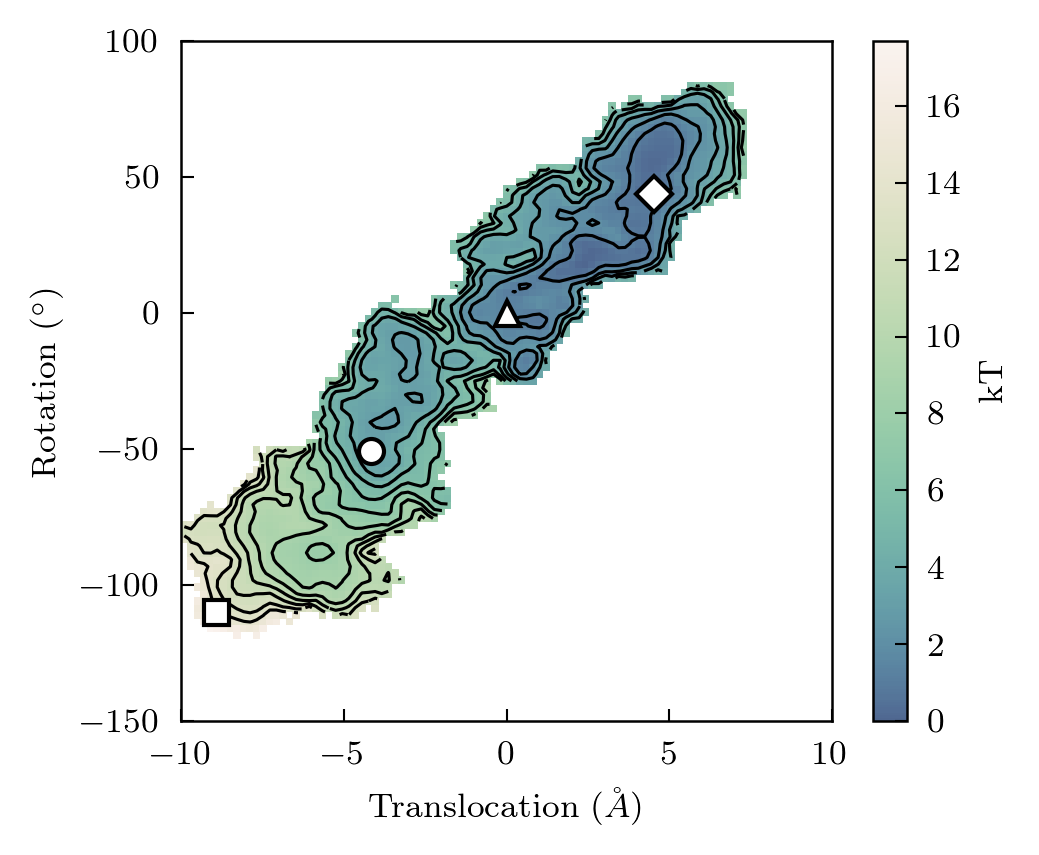

In [14]:
f = plt.figure(figsize=(3.5, 3), dpi=300)
ax = f.add_subplot(111)
x = np.linspace(-9.9, 9.1, 95)
y = np.linspace(-138.75, 91.25, 92)
h = ax.pcolor(x, y, pmf2d[:, :, 2].T, cmap=cm_seq, shading="auto")
clines = np.linspace(0, 14, 15)
ax.contour(x, y, pmf2d[:, :, 2].T, clines, colors="black")
plotting.format_cvs(ax, centroids=False, ms=6)
ax.legend(loc="upper left")
plt.colorbar(h, ax=ax, label="kT")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


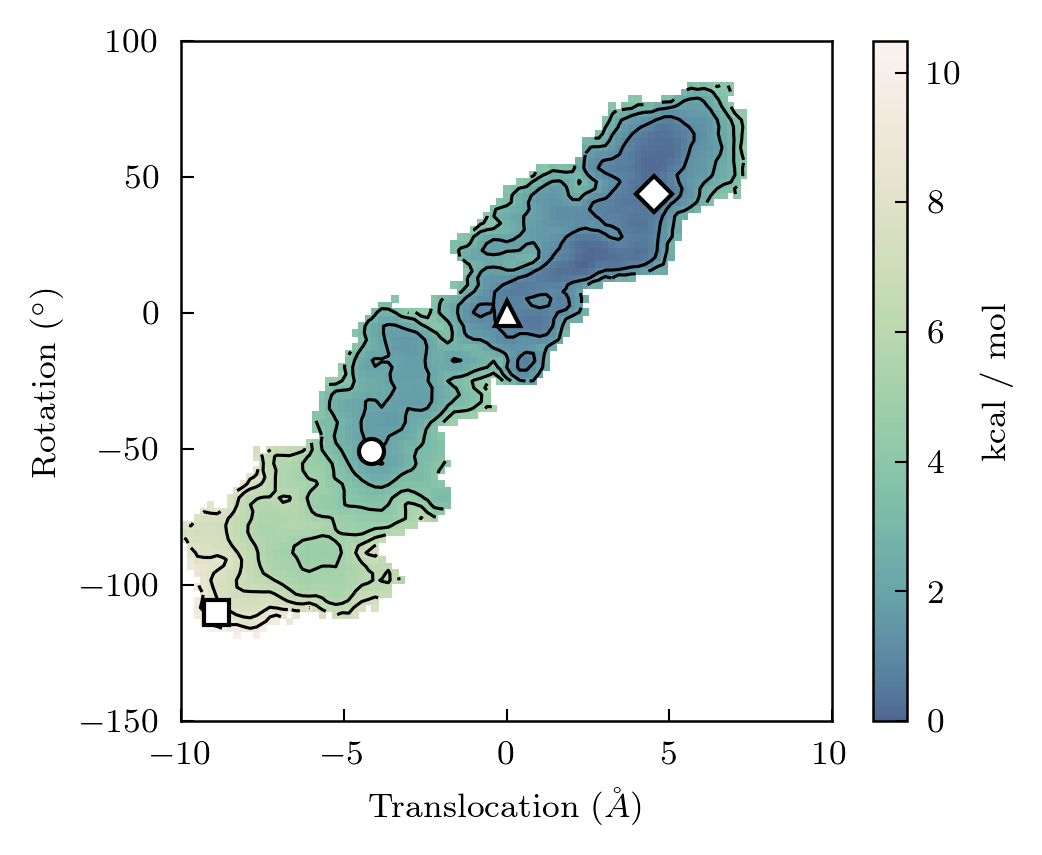

In [16]:
f = plt.figure(figsize=(3.5, 3), dpi=300)
ax = f.add_subplot(111)
x = np.linspace(-9.9, 9.1, 95)
y = np.linspace(-138.75, 91.25, 92)
h = ax.pcolor(x, y, pmf2d[:, :, 2].T * 0.593, cmap=cm_seq, shading="auto")
clines = np.linspace(0, 10, 11)
ax.contour(x, y, pmf2d[:, :, 2].T * 0.593, clines, colors="black")
plotting.format_cvs(ax, centroids=False, ms=6)
ax.legend(loc="upper left")
plt.colorbar(h, ax=ax, label="kcal / mol")

In [14]:
# load committor data
q = np.load("../../data/feat5_tica_ind1000_du/q_downup.npy", allow_pickle=True)[9]
w = np.load("../../data/coms_feat5_ind200_anton.npy", allow_pickle=True)[9]

In [15]:
q = np.concatenate(q)
w = np.concatenate(w)
print(q.shape)

(3000000,)


In [16]:
cv_arr = np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)

In [17]:
cv_arr = np.concatenate(cv_arr)
print(cv_arr.shape)

(3000000, 2)


In [18]:
# bin using same edges as PMF
q_dens, xe, ye = np.histogram2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=[95, 92],
    range=[[-9.9, 9.1], [-138.75, 91.25]],
    density=False,
    weights=q * w,
)
w_dens, _, _ = np.histogram2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=[95, 92],
    range=[[-9.9, 9.1], [-138.75, 91.25]],
    density=False,
    weights=w,
)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 1.0, 'Committor, lag = 20 ns')

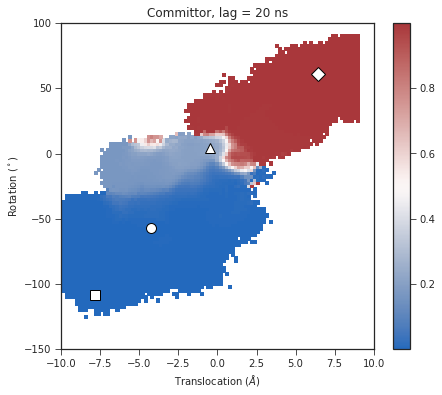

In [19]:
f, ax = plt.subplots(figsize=(7, 6))
h = ax.pcolor(xe, ye, (q_dens / w_dens).T, cmap="vlag")
plt.colorbar(
    h,
    ax=ax,
)
util.format_cvs(ax, centroids=True)
plt.title("Committor, lag = 20 ns")

In [70]:
# bin PMF values on committor values
q_arr = (q_dens / w_dens).T
pmf = pmf2d[:, :, 2].T * 0.593
b = np.linspace(0, 1, 101)
hist, edges = np.histogram(q_arr * pmf, bins=b)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
